<a href="https://colab.research.google.com/github/harithmote98/harith_INFO5731_Fall2021/blob/main/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [16]:
# Write your code here
# Import required packages
import numpy as np
import pandas as pd
import logging
#pip install pyLDAvis
#import pyLDAvis
#import pyLDAvis.gensim_models
import json
import warnings
warnings.filterwarnings('ignore')  # To ignore all warnings that arise here to enhance clarity




In [17]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array


In [19]:
import pandas as pd
import io
  
df = pd.read_csv(io.BytesIO(uploaded['tweets.csv'])) #importing the csv file
print(df)

      Unnamed: 0                                               text
0              0                @VirginAmerica What @dhepburn said.
1              1  @VirginAmerica plus you've added commercials t...
2              2  @VirginAmerica I didn't today... Must mean I n...
3              3  @VirginAmerica it's really aggressive to blast...
4              4  @VirginAmerica and it's a really big bad thing...
...          ...                                                ...
4994        4994  @SouthwestAir    Promotion e-mail today (Vegas...
4995        4995               @SouthwestAir safety back in Dallas!
4996        4996  @SouthwestAir No like I said I could not reach...
4997        4997  @SouthwestAir you guys are so amazing for send...
4998        4998  @SouthwestAir BTW, not a weather delay. We've ...

[4999 rows x 2 columns]


In [20]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...
...,...
4994,@SouthwestAir Promotion e-mail today (Vegas...
4995,@SouthwestAir safety back in Dallas!
4996,@SouthwestAir No like I said I could not reach...
4997,@SouthwestAir you guys are so amazing for send...


In [21]:
# Convert to array
docs =array(df['text'])
# Define function for tokenize and lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [22]:
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

In [23]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
# Perform function on our document
docs = docs_preprocessor(docs)

In [25]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])


In [27]:
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [28]:
#Remove rare & common tokens 
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)
dictionary.filter_extremes(no_below=10, no_above=0.2)
#Create dictionary and corpus required for Topic Modeling
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))
print(corpus[:1])

Number of unique tokens: 787
Number of documents: 4999
[[(0, 1), (1, 1), (2, 1)]]


In [29]:
# Set parameters.
num_topics = 5
chunksize = 500 
passes = 20 
iterations = 400
eval_every = 1  


In [30]:
# Make a index to word dictionary.
temp = dictionary[0]  # only to "load" the dictionary.
id2word = dictionary.id2token


In [31]:
lda_model = LdaModel(corpus=corpus, id2word=id2word, chunksize=chunksize, \
                       alpha='auto', eta='auto', \
                       iterations=iterations, num_topics=num_topics, \
                       passes=passes, eval_every=eval_every)

In [32]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())


[(0, '0.037*"bag" + 0.033*"companion_pas" + 0.032*"connecting_flight" + 0.028*"sent" + 0.028*"told" + 0.024*"worst" + 0.020*"checked" + 0.019*"pas" + 0.019*"being" + 0.019*"hotel"'), (1, '0.071*"customer_service" + 0.041*"service" + 0.039*"customer" + 0.033*"your" + 0.023*"thank" + 0.020*"need" + 0.018*"cancelled_flighted" + 0.017*"again" + 0.013*"phone" + 0.012*"flight_attendant"'), (2, '0.118*"late_flight" + 0.069*"late" + 0.051*"late_flightr" + 0.043*"hour" + 0.039*"over_hour" + 0.032*"hour_late" + 0.032*"connection" + 0.031*"miss" + 0.028*"miss_connection" + 0.025*"hour_delay"'), (3, '0.063*"southwestair" + 0.028*"that" + 0.025*"have" + 0.022*"with" + 0.021*"this" + 0.019*"from" + 0.019*"http" + 0.018*"thanks" + 0.016*"time" + 0.015*"your"'), (4, '0.094*"cancelled" + 0.080*"cancelled_flightled" + 0.040*"problem" + 0.040*"flightled" + 0.029*"where" + 0.028*"staff" + 0.023*"flight_booking" + 0.022*"booked" + 0.019*"been_hold" + 0.018*"mile"')]


In [33]:
# Compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.3349667270609604


In [34]:
# Compute Coherence Score using UMass
coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  -9.439012324728644


In [35]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [36]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)

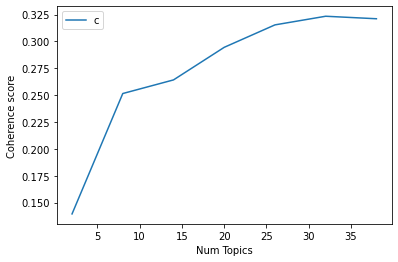

In [37]:
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [38]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt




In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:

def preprocess_data(doc_set):
    
    tokenizer = RegexpTokenizer(r'\w+')
    
    en_stop = set(stopwords.words('english'))
    
    p_stemmer = PorterStemmer()
    
    texts = []
    
    for i in doc_set:
        
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        
        stopped_tokens = [i for i in tokens if not i in en_stop]
        
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        
        texts.append(stemmed_tokens)
    return texts
preprocess_data(df)

[['text']]

In [48]:
def prepare_corpus(doc_clean):
    
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix

In [49]:
number_of_topics=7
words=10

In [50]:

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [51]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [52]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

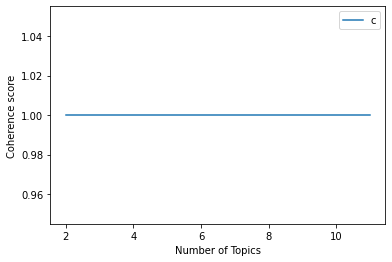

In [54]:
start,stop,step=2,12,1
plot_graph(preprocess_data(df),start,stop,step)

In [55]:
model=create_gensim_lsa_model(preprocess_data(df),number_of_topics,words)

[(0, '1.000*"text"')]


In [57]:
for no_of_topics, cv in zip(range(2, 60, 6), coherence_values_lsa):
  print("Num Topics:", no_of_topics, " - Coherence Value:", round(cv, 4))

NameError: ignored

## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)


Latent Semantic Analysis has lower accuracy than Latent Dirichlet allocation has better accuracy.
 Here, The Coherence value for optimal number of topics for LSA is 45 where as for LDA is 73.
  From this we will get to know that Accuracy for LDA is better. LDA has better accuracy that means we can easily generalize LDA model to other new documents.
   LSA has less interpretability among the topics beacuse of dimensionality reduction where as we interpret topic very easily in LDA. I got 14 topics for LDA
  which are highly interpretable than 20 topics of LSA. LSA has less efficient representation.

